<a href="https://colab.research.google.com/github/p-kolluri/praharsh_data690/blob/main/assignment_05/Part_3_Using_Jupyter_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-5: Part_3 Using Jupyter Notebook.

Name: Praharsh Kolluri.


"The Jupyter Notebook is the original web application for creating and sharing computational documents. It offers a simple, streamlined, document-centric experience." This is the textbook definition, jupyter notebook is basically a online application where you can execute code, visualize, make changes and share with ease.


## ⚡Part 1: Everything is a cell.



Jupyter notebooks are organized as a set of "cells". Each cell can contain different types of content (markdown text, Python code, R code, etc.) This cell containing text is a markdown cell, cells with code are code cells, as displayed below.

In [ ]:
5*8

40

There are a bunch of operations which can be performed in each cell. Here are some shortcuts for those operations.

First, we need to know that they are 2 modes in the Jupyter Notebook App: command mode and edit mode. I’ll start with the shortcuts shared between the two modes.

1. Shift + Enter -  run the current cell, select below. 
2. Ctrl + Enter - run selected cells.
3. Alt + Enter -  run the current cell, insert below.
4. Ctrl + S - save and checkpoint.

For further reference on shortcuts - https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330





## ⚡ Part 2: Working with code.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

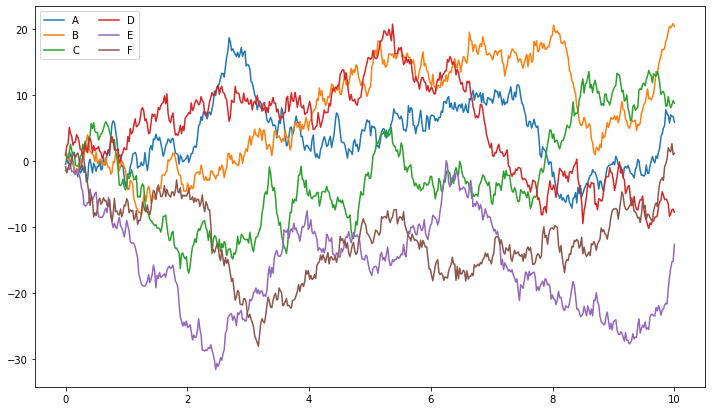

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## ⚡ Part 3: Interacting with Data.

In [ ]:
import requests
import pandas as pd

Pre-defined function to pull data from Cryptowatch.

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Pulling Data from ether and bitcoin.

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-03-21 18:03:20.973188')

In [ ]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [ ]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

## ⚡ Bitcoin

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-03-21 19:00:00,41077.67,41170.15,40955.46,40958.35,57.836178,2.374085e+06
2022-03-21 20:00:00,40953.46,41214.16,40868.37,41199.35,55.397357,2.271636e+06
2022-03-21 21:00:00,41198.64,41290.00,41144.74,41155.28,19.256755,7.937867e+05
2022-03-21 22:00:00,41122.01,41330.44,41071.72,41330.44,36.322956,1.496268e+06
2022-03-21 23:00:00,41324.28,41392.49,41136.32,41141.63,22.056110,9.111253e+05


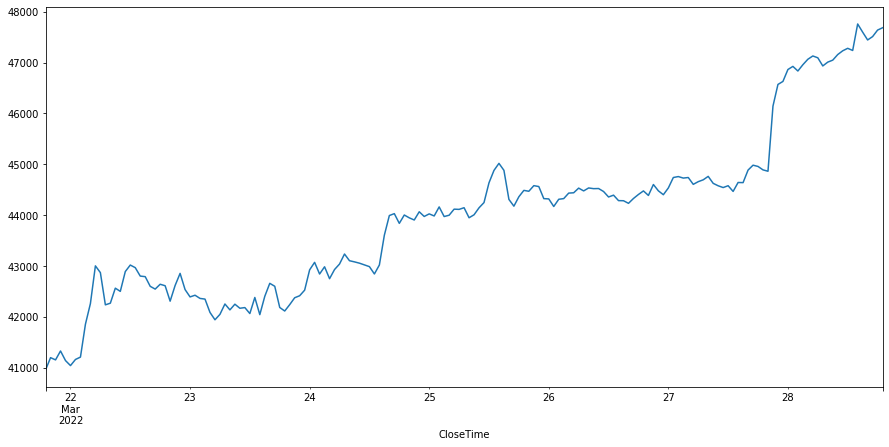

In [ ]:
btc['ClosePrice'].plot(figsize=(15, 7))

## ⚡ Ether

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-03-21 19:00:00,2922.50,2925.41,2905.78,2905.78,148.233004,432172.071958
2022-03-21 20:00:00,2908.65,2921.43,2896.42,2920.46,257.149536,747528.048979
2022-03-21 21:00:00,2919.15,2925.92,2910.74,2912.56,134.657058,393111.883944
2022-03-21 22:00:00,2911.75,2923.14,2901.11,2923.14,272.254286,792445.814035
2022-03-21 23:00:00,2923.35,2925.00,2909.15,2910.54,290.276874,847616.300076


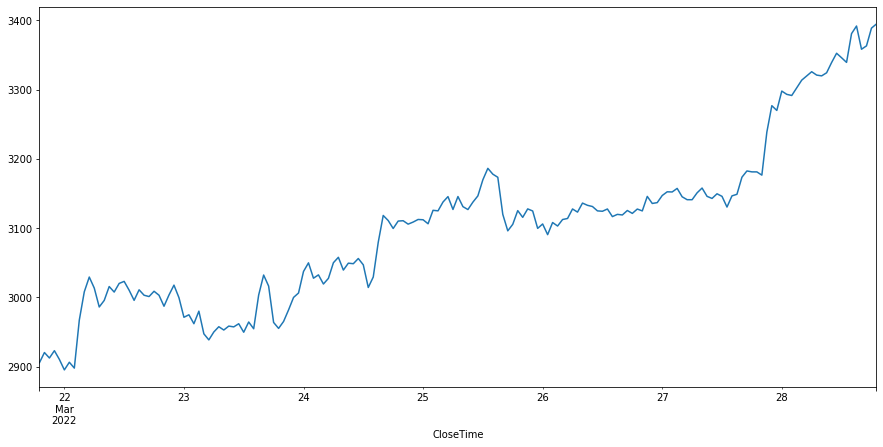

In [ ]:
eth['ClosePrice'].plot(figsize=(15, 7))

## ⚡ Bonus : Dynamic plots with Bokeh

Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## ⚡ Part 4: Exporting to excel.

Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab. Especially using pandas library.

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [ ]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [ ]:
eth.to_excel(writer, sheet_name='Ether')

In [ ]:
writer.save()
